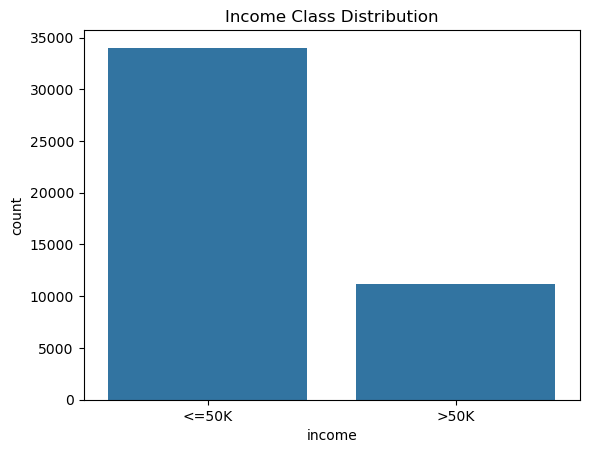

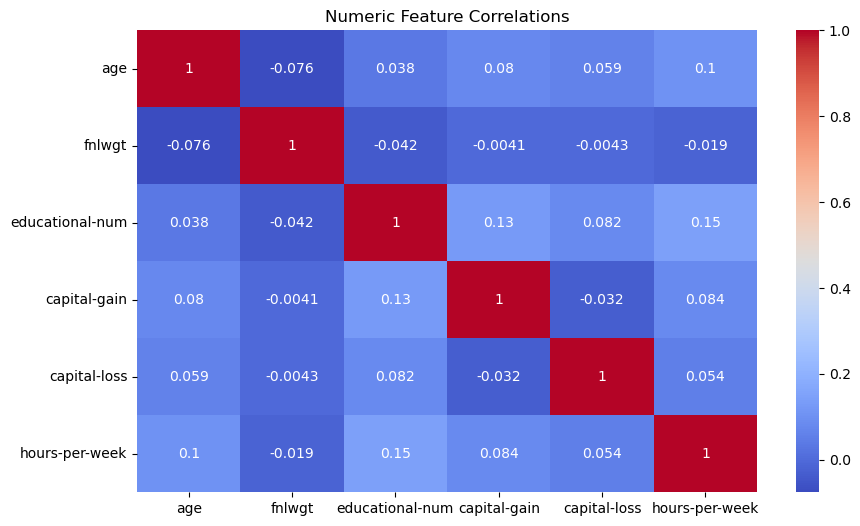

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6842
           1       0.73      0.62      0.67      2203

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.79      9045
weighted avg       0.85      0.85      0.85      9045



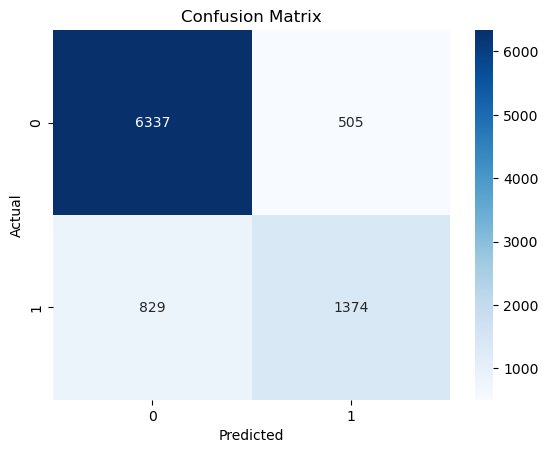

['../model/salary_predictor_pipeline.pkl']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load data
df = pd.read_csv('../data/adult.csv')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

X = df.drop('income', axis=1)
y = (df['income'] == '>50K').astype(int)

# Define columns
num_features = X.select_dtypes(include=['int64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# 🔢 Class Distribution
sns.countplot(data=df, x='income')
plt.title('Income Class Distribution')
plt.show()

# 🔥 Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlations')
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with RandomForest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# 🔍 Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the model
joblib.dump(pipeline, '../model/salary_predictor_pipeline.pkl')
